# RFC model training

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle

import time
import matplotlib
import matplotlib.pyplot as plt
import math
import random

import sklearn
import scikitplot as skplt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics


dataset/train\nonrecyclable
dataset/train\nonrecyclable\1651880565486.jpeg
<class 'numpy.ndarray'>


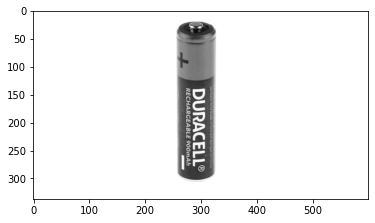

dataset/train\recyclable
dataset/train\recyclable\cardboard1.jpg
<class 'numpy.ndarray'>


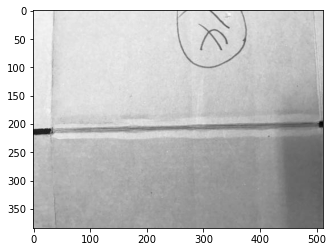

In [2]:
DATADIR = "dataset/train"
CATEGORIES = ["nonrecyclable", "recyclable"]

for category in CATEGORIES:  # do bad and good
    path = os.path.join(DATADIR,category)  # create path to nonrecyclable and recyclable
    print(path) #Check path
    for img in os.listdir(path):  # iterate over each image per nonrecyclable and recyclable
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE )  # convert to array 
        print(os.path.join(path,img)) #Check Image path
        print(type(img_array))   # Check Image converted type
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
#     break  #...and one more!

In [3]:
DATADIR = "dataset/train"
CATEGORIES = ["nonrecyclable", "recyclable"]

IMG_SIZE = 50  #set image size
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do bad and good

        path = os.path.join(DATADIR,category)  # create path to bad and good
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=bad 1=good

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass


In [4]:
# 1st train
create_training_data()
print('Length of training Data')
print(len(training_data))

# Shuffle the train data
random.shuffle(training_data)

# Check the train data were shuffled successful
print("Check Shuffled Data")
for sample in training_data[:10]:
    print(sample[1])

#Add the trained data into a list
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#Change the data to 2D array
X_2D=[]
for a in X:
    X_2D.append(a.reshape(-1))
    

#Save the processed Training Data into a pickle file
pickle_out = open("pickle_file/X1_RFC.pickle","wb")
pickle.dump(X_2D, pickle_out)
pickle_out.close()

pickle_out = open("pickle_file/y1_RFC.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

100%|██████████| 876/876 [00:10<00:00, 82.97it/s] 

Length of training Data
1711
Check Shuffled Data
1
1
1
0
1
1
1
0
1
0


In [5]:
# 2nd train
create_training_data()
print('Length of training Data')
print(len(training_data))

# Shuffle the train data
random.shuffle(training_data)

# Check the train data were shuffled successful
print("Check Shuffled Data")
for sample in training_data[:10]:
    print(sample[1])

#Add the trained data into a list
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#Change the data to 2D array
X_2D=[]
for a in X:
    X_2D.append(a.reshape(-1))
    

#Save the processed Training Data into a pickle file
pickle_out = open("pickle_file/X2_RFC.pickle","wb")
pickle.dump(X_2D, pickle_out)
pickle_out.close()

pickle_out = open("pickle_file/y2_RFC.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

100%|██████████| 876/876 [00:05<00:00, 153.87it/s]

Length of training Data
3422
Check Shuffled Data
1
1
0
0
1
1
1
0
1
0


In [9]:
# 3rd train
create_training_data()
print('Length of training Data')
print(len(training_data))

# Shuffle the train data
import random
random.shuffle(training_data)

# Check the train data were shuffled successful
print("Check Shuffled Data")
for sample in training_data[:10]:
    print(sample[1])

#Add the trained data into a list
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#Change the data to 2D array
X_2D=[]
for a in X:
    X_2D.append(a.reshape(-1))
    

#Save the processed Training Data into a pickle file
pickle_out = open("pickle_file/X3_RFC.pickle","wb")
pickle.dump(X_2D, pickle_out)
pickle_out.close()

pickle_out = open("pickle_file/y3_RFC.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

100%|██████████| 876/876 [00:05<00:00, 152.67it/s]


Length of training Data
6844
Check Shuffled Data
0
0
1
0
0
1
1
1
1
1


In [10]:
TRAINED_DATASET_X="pickle_file/X1_RFC.pickle"     # Accuracy: 0.7447183098591549
TRAINED_DATASET_y="pickle_file/y1_RFC.pickle"
#TRAINED_DATASET_X="pickle_file/X2_RFC.pickle"     # Accuracy: 0.7183098591549296
#TRAINED_DATASET_y="pickle_file/y2_RFC.pickle"
#TRAINED_DATASET_X="pickle_file/X3_RFC.pickle"     # Accuracy: 0.7517605633802817
#TRAINED_DATASET_y="pickle_file/y3_RFC.pickle"

pickle_in = open(TRAINED_DATASET_X,"rb")
X_train = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open(TRAINED_DATASET_y,"rb")
y_train = pickle.load(pickle_in)
pickle_in.close()

# Double check the length of data and labels
print(len(X_train))
print(len(y_train))

1711
1711


In [11]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

# RFC Model Testing

In [12]:
# Create lists
X_test_data = []
X_test_data_2D=[]
y_test_data=[]
files = []
files_path=[]
IMG_SIZE = 50   #to resize the image
CATEGORIES = ["nonrecyclable", "recyclable"]
def loadall_test_data():
    
    DATADIR = "dataset/test"
    CATEGORIES = ["nonrecyclable", "recyclable"]
    for category in CATEGORIES:  # do recyclable and nonrecyclable
        path = os.path.join(DATADIR,category)  # create path to recyclable and nonrecyclable
       
        for img in tqdm(os.listdir(path)):  # iterate over each image per recyclable and nonrecyclable
            try:
                
                files_path.append(os.path.join(path,img))                
                files.append(img) # Add file name
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                X_test_data.append(new_array)  # add this to our test_data
                if(category==CATEGORIES[0]):
                    y_test_data.append(0)
                elif(category==CATEGORIES[1]):
                    y_test_data.append(1)
            except Exception as e:  # in the interest in keeping the output clean...
                pass
    
loadall_test_data()
for b in X_test_data:
    X_test_data_2D.append(b.reshape(-1))

100%|██████████| 219/219 [00:02<00:00, 105.09it/s]


In [13]:
#Test the data
print("Accuracy")
model.score(X_test_data_2D, y_test_data)
y_pred=model.predict(X_test_data_2D)
print(model.score(X_test_data_2D, y_test_data))
print(y_pred)

for i, p in enumerate(y_pred):
    print("File Name:",files[i])
    print("File Path:",files_path[i])
    print("Label: ",CATEGORIES[p])
    print(i)

Accuracy
0.7032710280373832
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0
 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0]
File Name: 960x0.jpg
File Path: dataset/test\nonrecyclable\960x0.jpg
Label:  nonrecyclable
0
File Name:

File Path: dataset/test\recyclable\metal237.jpg
Label:  recyclable
339
File Name: metal24.jpg
File Path: dataset/test\recyclable\metal24.jpg
Label:  nonrecyclable
340
File Name: metal240.jpg
File Path: dataset/test\recyclable\metal240.jpg
Label:  nonrecyclable
341
File Name: metal275.jpg
File Path: dataset/test\recyclable\metal275.jpg
Label:  recyclable
342
File Name: metal277.jpg
File Path: dataset/test\recyclable\metal277.jpg
Label:  recyclable
343
File Name: metal278.jpg
File Path: dataset/test\recyclable\metal278.jpg
Label:  recyclable
344
File Name: metal281.jpg
File Path: dataset/test\recyclable\metal281.jpg
Label:  recyclable
345
File Name: metal29.jpg
File Path: dataset/test\recyclable\metal29.jpg
Label:  nonrecyclable
346
File Name: metal291.jpg
File Path: dataset/test\recyclable\metal291.jpg
Label:  recyclable
347
File Name: metal299.jpg
File Path: dataset/test\recyclable\metal299.jpg
Label:  recyclable
348
File Name: metal3.jpg
File Path: dataset/test\recyclable\metal3.jpg
L

Confusion matrix:
[[0.76555024 0.23444976]
 [0.35616438 0.64383562]]


<Figure size 864x576 with 0 Axes>

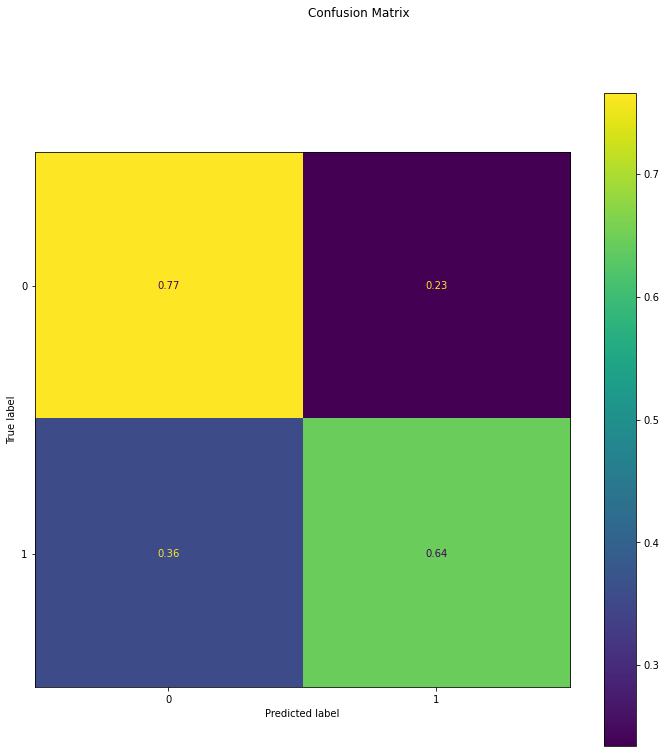

In [14]:
plt.figure(figsize=(12,8))
f,ax=plt.subplots(1,1,figsize=(12,12))
disp = metrics.plot_confusion_matrix(model, X_test_data_2D, y_test_data,normalize='true',ax=ax)
disp.figure_.suptitle("Confusion Matrix")

print("Confusion matrix:\n%s" % disp.confusion_matrix)